# K Means Clustering Algorithms Implementation

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.datasets import make_blobs
%matplotlib inline
from sklearn.datasets import load_iris

In [57]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [58]:
X

array([[ 4.98899417, -2.13495537],
       [-8.29654363, -6.87315622],
       [-6.45054705, -5.44836572],
       ...,
       [ 2.44880013, -1.09731567],
       [-8.47178366, -5.84682781],
       [ 3.08010351,  1.05464289]])

In [59]:
y[:5] # y is not being used as its unsupervised machine learning and clustering is done for X only 

array([2, 1, 1, 0, 2])

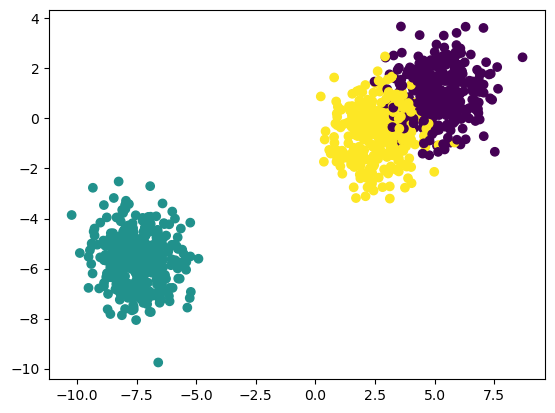

In [61]:
plt.scatter(X[:,0],X[:,1],c=y)

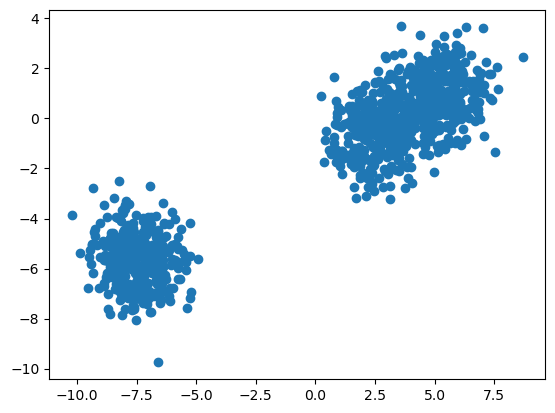

In [62]:
plt.scatter(X[:,0],X[:,1])

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [64]:
from sklearn.cluster import KMeans

In [65]:
## Elbow Method to select the K value (Sum of squares will be used)
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [66]:
wcss

[26889.46075430419,
 2396.684236396952,
 1296.9972613892683,
 1116.0819681276475,
 942.4257312395448,
 821.6393931614497,
 721.6908111386847,
 615.7194830597534,
 545.7575003124086,
 493.97813957026864]

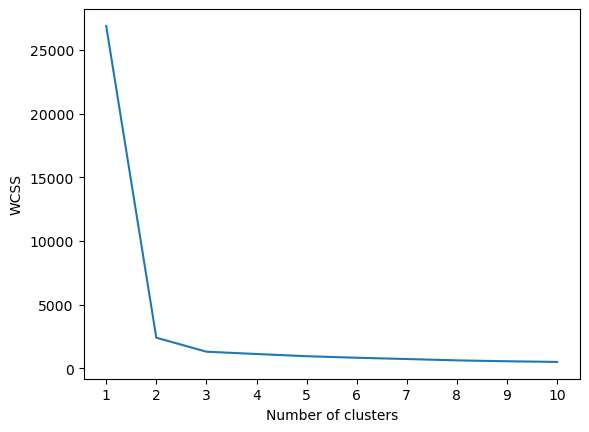

In [67]:
## Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [69]:
y_label=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


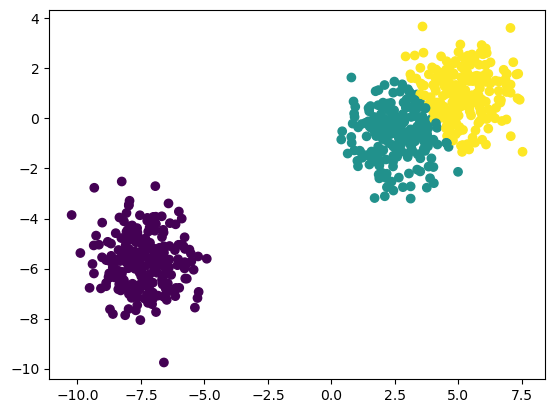

In [70]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [71]:
## Knee Locator 
!pip install kneed

In [72]:
from kneed import KneeLocator

In [73]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

2

In [74]:
## Silhoutte Score 
from sklearn.metrics import silhouette_score

In [75]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [76]:
silhouette_coefficients

[0.8146671727828025,
 0.6033816570274193,
 0.5117160479319904,
 0.33459829545130326,
 0.31825075909317685,
 0.32725768131872,
 0.330684857304404,
 0.3474582647515358,
 0.3493592306598992]

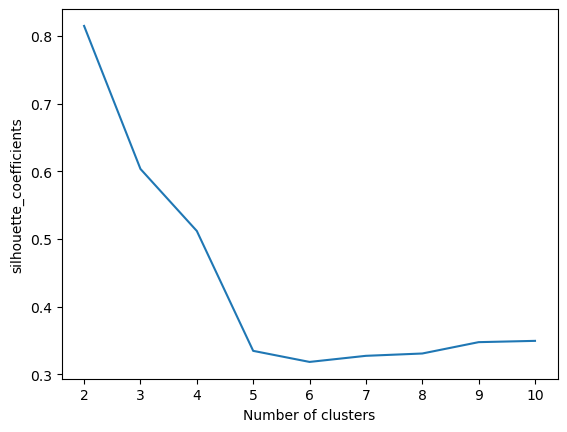

In [77]:
## Plotting Silsilhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show() # K=3 is the best value 

# Hierarical Clustering Implementation 

In [85]:
# Import Iris Dataset
iris=load_iris()

In [86]:
iris_data=pd.DataFrame(iris.data)

In [87]:
iris_data.columns=iris.feature_names

In [88]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
iris_data.shape

(150, 4)

In [90]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [91]:
x_scaled=scaler.fit_transform(iris_data)

In [95]:
x_scaled[:6]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993]])

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca=PCA(n_components=2)

In [98]:
pca_scaled=pca.fit_transform(x_scaled)

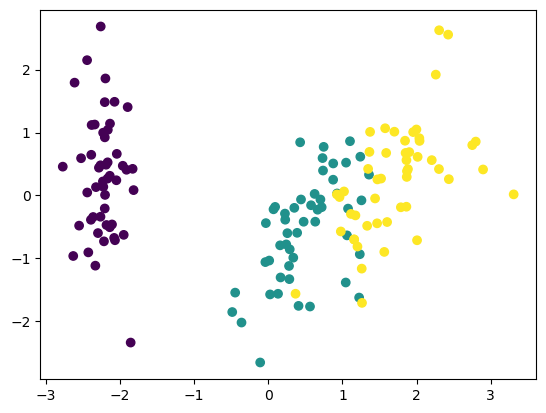

In [99]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

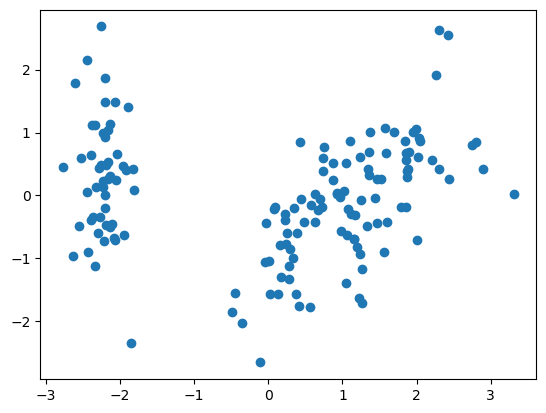

In [100]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

(array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
         115,  125,  135,  145,  155,  165,  175,  185,  195,  205,  215,
         225,  235,  245,  255,  265,  275,  285,  295,  305,  315,  325,
         335,  345,  355,  365,  375,  385,  395,  405,  415,  425,  435,
         445,  455,  465,  475,  485,  495,  505,  515,  525,  535,  545,
         555,  565,  575,  585,  595,  605,  615,  625,  635,  645,  655,
         665,  675,  685,  695,  705,  715,  725,  735,  745,  755,  765,
         775,  785,  795,  805,  815,  825,  835,  845,  855,  865,  875,
         885,  895,  905,  915,  925,  935,  945,  955,  965,  975,  985,
         995, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095,
        1105, 1115, 1125, 1135, 1145, 1155, 1165, 1175, 1185, 1195, 1205,
        1215, 1225, 1235, 1245, 1255, 1265, 1275, 1285, 1295, 1305, 1315,
        1325, 1335, 1345, 1355, 1365, 1375, 1385, 1395, 1405, 1415, 1425,
        1435, 1445, 1455, 1465, 1475, 

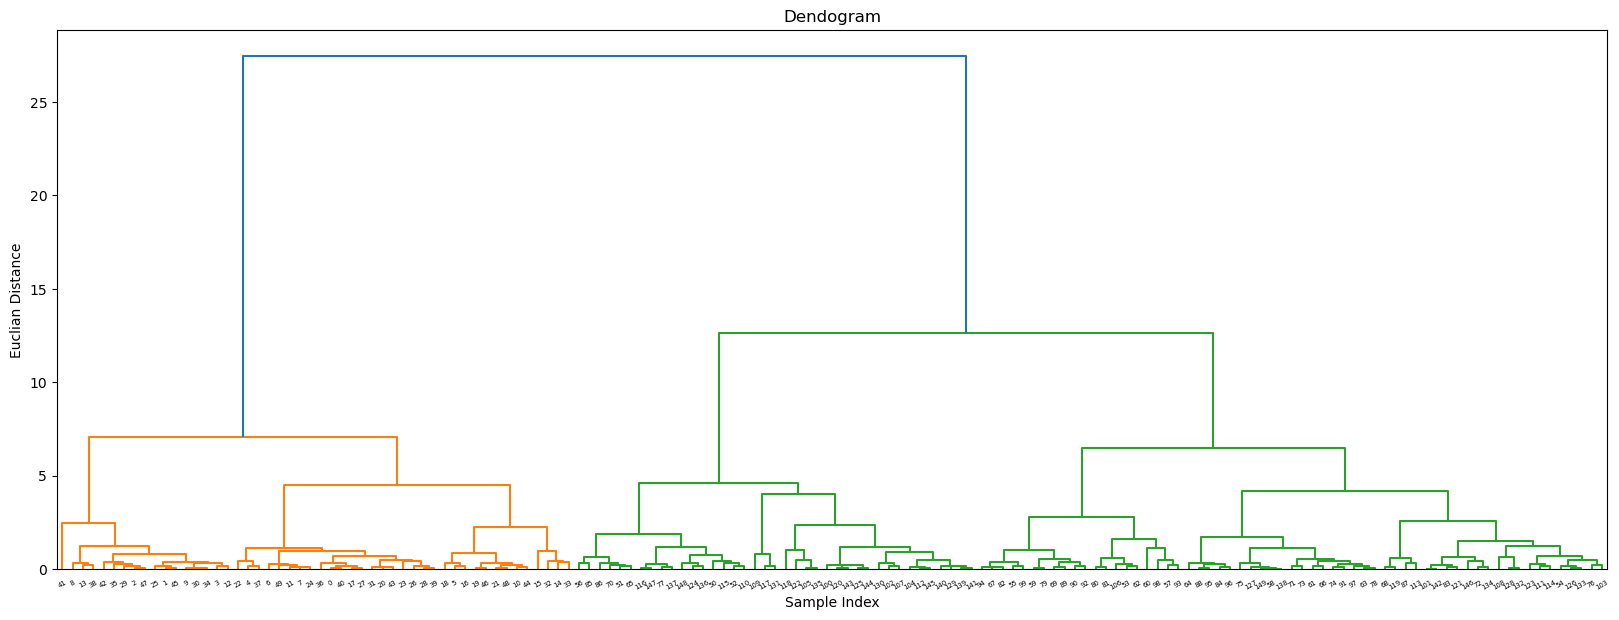

In [105]:
## Agglomerative Clustering
## To construct a dendogram 
import scipy.cluster.hierarchy as sc
## Plot the dendogram 
plt.figure(figsize=(20,7))
plt.title('Dendogram')

# create Dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclian Distance')
plt.xticks(rotation=30)

In [106]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [107]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

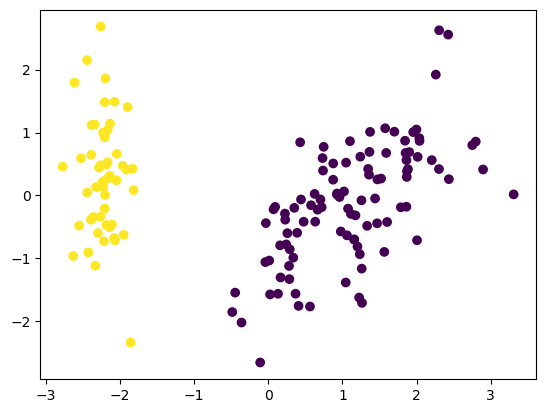

In [108]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [109]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [112]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

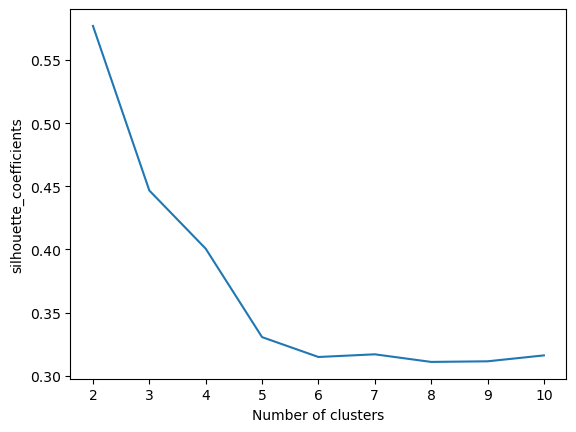

In [113]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show() # K=3 is the best value 